<div class="alert alert-block alert-success">
    <em>A workshop on:</em><br>
    <h1>Clustering Methods in Data Analysis</h1>
<strong> By: Syed Mujahid (smujahid AT kfupm.edu.sa;  mnusyed AT gmail.com),</strong> <br>
    SE Dept at KFUPM.
<br>
    <br><br>
 
 
<h2>Outline:<h2> 
<ul style="font-size:15px;list-style-type:square;">
  <li>Data Clustering</li>
  <li>K-means</li>
  <li>DBSCAN</li>
  <li>Exercise-1</li>
  <li>Exercise-2</li>
  <li>Refrences</li>
</ul> 
 
</div>

<div class="alert alert-block alert-info">  <h1> Data Clustering </h1> </div>

 ### Key Requirement
 
 $$ find: \; natural\;groups\;in\;data$$

Given $N$ data points in $n$ dimesnions, clustering problem can be realized as:

\begin{align}
min:  \qquad & \sum_{i}\sum_{j} \, x_{i,c}  \, x_{j,c}  \, \color{red}\mu(\mathbf{p}_i,\mathbf{p}_j) -  \sum_{i}\sum_{j} \, (1-x_{i,c})  \, x_{j,c}  \, \color{red}\eta(\mathbf{p}_i,\mathbf{p}_j)\\
subject\;to:&\\
& \sum_c x_{i,c} = 1 \qquad \forall i \in N \\
& \sum_i x_{i,c} \geq 1 \qquad \forall c \in K \\
& x_{i,c} \in \{0,\;1\} \qquad \forall i \in N, c \in K
\end{align}

where  $\mathbf{p}_i$ and $\mathbf{p}_j$ are $i^{th}$ and $j^{th}$ data points, and $\color{red}\mu()$ is a similarity measure, and $\color{red}\eta()$ is a dissimilarity measure.

### Reading data  (Data-1)

In [1]:
import pandas as pd
df = pd.read_csv('data\Data1.txt', sep="\t", header=None)
df.head()

,0,1
0,5.867498,8.177152
1,5.613700,9.932955
2,7.225084,10.448862
3,6.762823,0.605145
4,8.016182,1.543147


### Visualizing Data-1

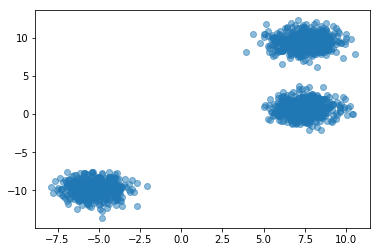

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df.loc[:,0],df.loc[:,1], alpha= 0.5)
plt.show()

<div class="alert alert-block alert-info">  <h1> K-means </h1> </div>

Given $N$ data points in $n$ dimesnions, K-means can be formulated as:

\begin{align}
min:  \qquad & \sum_{i \in N}\sum_{c \in K} \, x_{i,c}  \Vert \mathbf{p}_i - \mathbf{g}_c\Vert^2 \\
subject\;to: & \\
& \sum_c x_{i,c} = 1 \qquad \forall i \in N \\
& \sum_i x_{i,c} \geq 1 \qquad \forall c \in K \\
& x_{i,c} \in \{0,\;1\} \qquad \forall i \in N, c \in K \\
& \mathbf{g}_c \in \mathbb{R}^n \qquad \forall c \in K
\end{align}

where $\mathbf{p}_i$ is an $i^{th}$ data point.

### Data-1

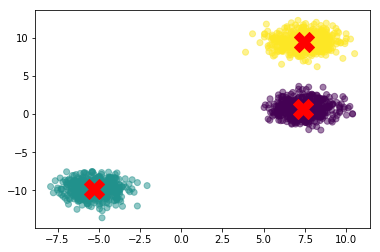

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=1000, n_init=10, random_state=0).fit(df)
plt.scatter(df.loc[:,0], df.loc[:,1], c=kmeans.labels_, alpha= 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='r', marker='X')
plt.show()

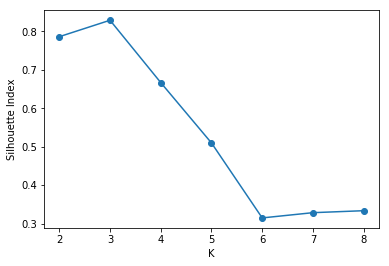

In [4]:
from sklearn import metrics

k = [2, 3, 4, 5, 6, 7, 8]
score=[]
for n in k:
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(df)
    score.append(metrics.silhouette_score(df,kmeans.labels_))
     
plt.plot(k, score, 'o-')
plt.xlabel("K")
plt.ylabel("Silhouette Index")
plt.show()

### Data-2

In [5]:
df2 = pd.read_csv('data\Compound.txt', sep="\t", header=None)
df2.head()
df2.drop([2], axis = 1, inplace = True)

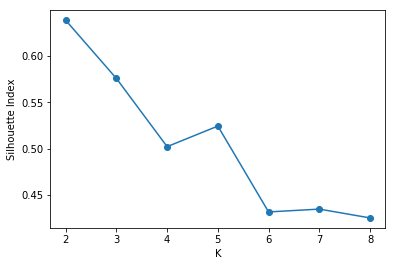

2


In [6]:
import numpy as np

k = [2, 3, 4, 5, 6, 7, 8]
score=[]
for n in k:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=1000, n_init=10, random_state=0).fit(df2)
    score.append(metrics.silhouette_score(df2,kmeans.labels_))

plt.plot(k, score, 'o-')
plt.xlabel("K")
plt.ylabel("Silhouette Index")
plt.show()

bestK = np.argmax(score) 
print(k[bestK])

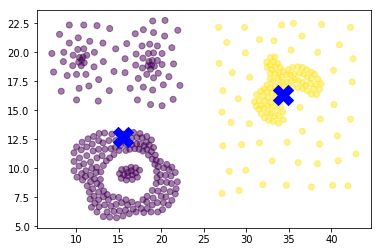

In [7]:
kmeans = KMeans(n_clusters=k[bestK], max_iter=1000, n_init=10, random_state=0).fit(df2)

plt.scatter(df2.loc[:,0], df2.loc[:,1], c=kmeans.labels_, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='b', marker='X')
plt.show()

<div class="alert alert-block alert-info">  <h1> DBSCAN </h1> </div>

It can be stated as:
$$group \; all\; the \; connected \; data\;points \; into \; a \; cluster$$
where
$$every\;cluster\;should\;have\;minimum\;cardinalty$$

### Trial

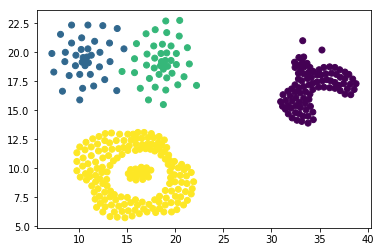

In [8]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 1.6, min_samples = 5).fit(df2)
clusFound = dbsc.labels_>-1

plt.scatter(df2.loc[clusFound,0], df2.loc[clusFound,1], c=dbsc.labels_[clusFound])
plt.show()


### Explore

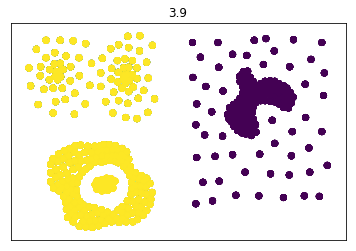

In [9]:
import time
from IPython import display

rad = np.around(np.arange(0.5, 4.0, 0.1),decimals=1)  

# plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])

for i, r in enumerate(rad):
    dbsc = DBSCAN(eps = r, min_samples = 5).fit(df2)
    clusFound = dbsc.labels_>-1
    plt.scatter(df2.loc[clusFound,0], df2.loc[clusFound,1], c=dbsc.labels_[clusFound])
    plt.title(str(r))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1)
    

### Tune 

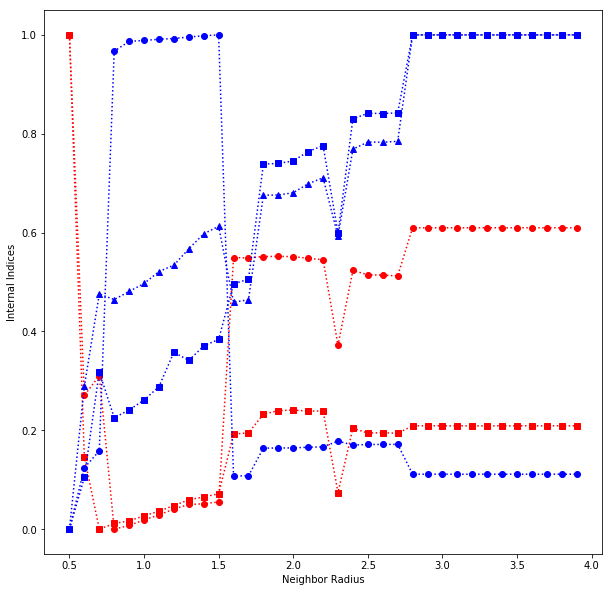

In [10]:
from sklearn import metrics
from s_dbw import SD
from s_dbw import S_Dbw

rad = np.around(np.arange(0.5, 4.0, 0.1),decimals=1)

sShil_max = np.empty([len(rad),1])
sDaBo_min = np.empty_like(sShil_max)
sCaHa_max = np.empty_like(sShil_max)
sSdbw_min = np.empty_like(sShil_max)
sSD_min = np.empty_like(sShil_max)  

noNoise = False

for i,r in enumerate(rad):
    dbsc = DBSCAN(eps = r, min_samples = 5).fit(df2)
    clusFound = dbsc.labels_> (-10 if noNoise else -1)
    sShil_max[i] = metrics.silhouette_score(df2[clusFound],dbsc.labels_[clusFound])
    sDaBo_min[i] = metrics.davies_bouldin_score(df2[clusFound],dbsc.labels_[clusFound]) 
    sCaHa_max[i] = metrics.calinski_harabasz_score(df2[clusFound],dbsc.labels_[clusFound])
    sSdbw_min[i] = S_Dbw(np.array(df2[clusFound]),dbsc.labels_[clusFound], centers_id=None, alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')
    sSD_min[i] = SD(np.array(df2[clusFound]),dbsc.labels_[clusFound],k=10.0,  centers_id=None, alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')

sShil_max = np.interp(sShil_max, (sShil_max.min(), sShil_max.max()), (0, 1))  
sDaBo_min = np.interp(sDaBo_min, (sDaBo_min.min(), sDaBo_min.max()), (0, 1))
sCaHa_max = np.interp(sCaHa_max, (sCaHa_max.min(), sCaHa_max.max()), (0, 1))
sSdbw_min = np.interp(sSdbw_min, (sSdbw_min.min(), sSdbw_min.max()), (0, 1))
sSD_min = np.interp(sSD_min, (sSD_min.min(), sSD_min.max()), (0, 1))

plt.figure(figsize=(10,10))
plt.plot(rad, sShil_max, 'o:',c='r')
plt.plot(rad, sCaHa_max, 's:',c='r')
plt.plot(rad, sDaBo_min, 'o:',c='b')
plt.plot(rad, sSdbw_min, 's:',c='b')
plt.plot(rad, sSD_min, '^:',c='b')
plt.xlabel("Neighbor Radius")
plt.ylabel("Internal Indices")
plt.show()

<div class="alert alert-block alert-info">  <h1> Exercise-1 </h1> </div>

### Read

In [11]:
df3 = pd.read_csv('data\Aggregation.txt', sep="\t", header=None)
df3.head()
df3.drop([2], axis = 1, inplace = True)

### Tune

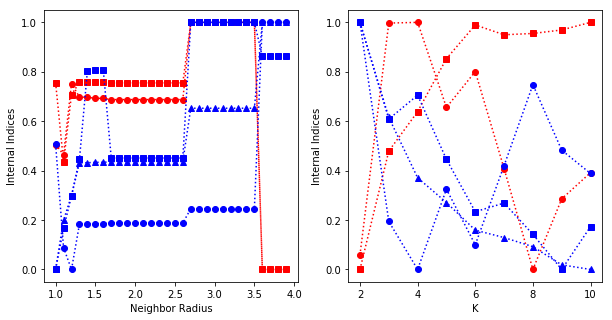

In [12]:

def indicesCompare(rad,maxK,df,ax=None):

    ## DBSCAN *********
    sShil_max = np.empty([len(rad),1])
    sDaBo_min = np.empty_like(sShil_max)
    sCaHa_max = np.empty_like(sShil_max)
    sSdbw_min = np.empty_like(sShil_max)
    sSD_min = np.empty_like(sShil_max)  

    noNoise = False

    for i,r in enumerate(rad):
        dbsc = DBSCAN(eps = r, min_samples = 5).fit(df)
        clusFound = dbsc.labels_> (-10 if noNoise else -1)
        sShil_max[i] = metrics.silhouette_score(df[clusFound],dbsc.labels_[clusFound])
        sDaBo_min[i] = metrics.davies_bouldin_score(df[clusFound],dbsc.labels_[clusFound]) 
        sCaHa_max[i] = metrics.calinski_harabasz_score(df[clusFound],dbsc.labels_[clusFound])
        sSdbw_min[i] = S_Dbw(np.array(df[clusFound]),dbsc.labels_[clusFound], centers_id=None, alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')
        sSD_min[i] = SD(np.array(df[clusFound]),dbsc.labels_[clusFound],k=10.0,  centers_id=None, alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')

    sShil_max = np.interp(sShil_max, (sShil_max.min(), sShil_max.max()), (0, 1))  
    sDaBo_min = np.interp(sDaBo_min, (sDaBo_min.min(), sDaBo_min.max()), (0, 1))
    sCaHa_max = np.interp(sCaHa_max, (sCaHa_max.min(), sCaHa_max.max()), (0, 1))
    sSdbw_min = np.interp(sSdbw_min, (sSdbw_min.min(), sSdbw_min.max()), (0, 1))
    sSD_min = np.interp(sSD_min, (sSD_min.min(), sSD_min.max()), (0, 1))
    
    plt.subplot(1,2,1)
    plt.plot(rad, sShil_max, 'o:',c='r')
    plt.plot(rad, sCaHa_max, 's:',c='r')
    plt.plot(rad, sDaBo_min, 'o:',c='b')
    plt.plot(rad, sSdbw_min, 's:',c='b')
    plt.plot(rad, sSD_min, '^:',c='b')
    plt.xlabel("Neighbor Radius")
    plt.ylabel("Internal Indices")

    ## K-means *******
    
    k = np.arange(2,maxK+1)

    sShil_max = np.empty([len(k),1])
    sDaBo_min = np.empty_like(sShil_max)
    sCaHa_max = np.empty_like(sShil_max)
    sSdbw_min = np.empty_like(sShil_max)
    sSD_min = np.empty_like(sShil_max)  

    for i,n in enumerate(k):
        kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(df)
        sShil_max[i] = metrics.silhouette_score(df,kmeans.labels_)
        sDaBo_min[i] = metrics.davies_bouldin_score(df,kmeans.labels_) 
        sCaHa_max[i] = metrics.calinski_harabasz_score(df,kmeans.labels_)
        sSdbw_min[i] = S_Dbw(np.array(df),kmeans.labels_, centers_id=None, alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')
        sSD_min[i] = SD(np.array(df),kmeans.labels_,k=100.0,  centers_id=None, alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')

    sShil_max = np.interp(sShil_max, (sShil_max.min(), sShil_max.max()), (0, 1))  
    sDaBo_min = np.interp(sDaBo_min, (sDaBo_min.min(), sDaBo_min.max()), (0, 1))
    sCaHa_max = np.interp(sCaHa_max, (sCaHa_max.min(), sCaHa_max.max()), (0, 1))
    sSdbw_min = np.interp(sSdbw_min, (sSdbw_min.min(), sSdbw_min.max()), (0, 1))
    sSD_min = np.interp(sSD_min, (sSD_min.min(), sSD_min.max()), (0, 1))

    plt.subplot(1,2,2)
    plt.plot(k, sShil_max, 'o:',c='r')
    plt.plot(k, sCaHa_max, 's:',c='r')
    plt.plot(k, sDaBo_min, 'o:',c='b')
    plt.plot(k, sSdbw_min, 's:',c='b')
    plt.plot(k, sSD_min, '^:',c='b')
    plt.xlabel("K")
    plt.ylabel("Internal Indices")
    
    ax = plt.gca()
    return ax

rad = np.around(np.arange(1, 4.0, 0.1),decimals=1)
maxK = 10
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
indicesCompare(rad,maxK,df3,ax1)
plt.show()


### Cluster

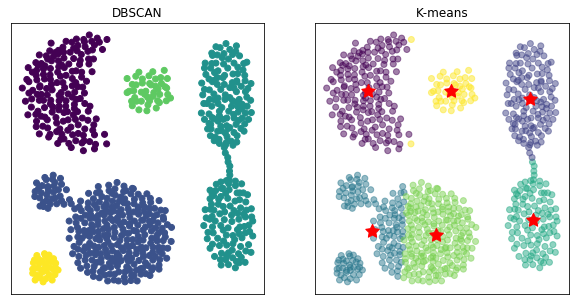

In [13]:

def drawClusters(r,n,df, ax=None):
    dbsc = DBSCAN(eps = r, min_samples = 5).fit(df)
    clusFound = dbsc.labels_>-1
    plt.subplot(1,2,1)
    plt.scatter(df.loc[clusFound,0], df.loc[clusFound,1], c=dbsc.labels_[clusFound])
    plt.title('DBSCAN')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    kmeans = KMeans(n_clusters=n, max_iter=1000, n_init=10, random_state=0).fit(df)
    plt.scatter(df.loc[:,0], df.loc[:,1], c=kmeans.labels_, alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='r', marker=(5, 1))
    plt.title('K-means')
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
    return ax

fig, ax1 = plt.subplots(1,1,figsize=(10,5))
drawClusters(1.75,6,df3,ax1)
plt.show()

<div class="alert alert-block alert-info">  <h1> Exercise-2 </h1> </div>

### Read

In [14]:
df4 = pd.read_csv('data\Data4.txt', sep="\t", header=None)
df4.head()
df4.drop([2], axis = 1, inplace = True)

### Tune

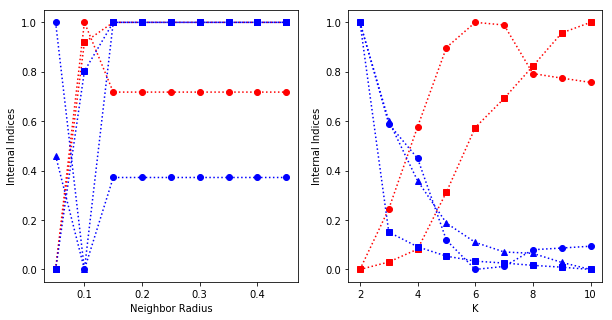

In [15]:
rad = np.around(np.arange(0.05, 0.5, 0.05),decimals=2)
maxK = 10
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
indicesCompare(rad,maxK,df4,ax1)
plt.show()

### Cluster

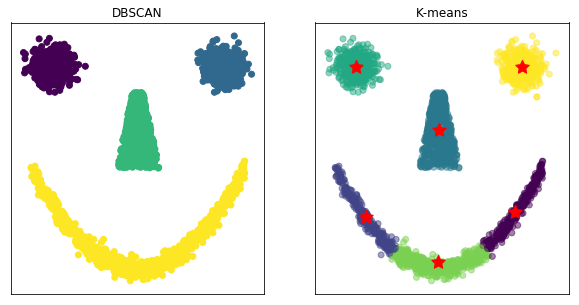

In [16]:
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
drawClusters(0.1,6,df4,ax1)
plt.show()

<div class="alert alert-block alert-info">  <h1> References </h1> </div>
 <ol>
<li>J. B. MacQueen (1967): "Some Methods for classification and Analysis of Multivariate Observations, Proceedings of 5-th Berkeley Symposium on Mathematical Statistics and Probability", Berkeley, University of California Press, 1:281-297</li>

<li>Ester, Martin; Kriegel, Hans-Peter; Sander, Jörg; Xu, Xiaowei (1996). Simoudis, Evangelos; Han, Jiawei; Fayyad, Usama M. (eds.). A density-based algorithm for discovering clusters in large spatial databases with noise. Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD-96). AAAI Press. pp. 226–231. CiteSeerX 10.1.1.121.9220. ISBN 1-57735-004-9.</li>

<li>Aggregation:  A. Gionis, H. Mannila, and P. Tsaparas, Clustering aggregation. ACM Transactions on Knowledge Discovery from Data (TKDD), 2007. 1(1): p. 1-30.</li>

<li>Compound: C.T. Zahn, Graph-theoretical methods for detecting and describing gestalt clusters. IEEE Transactions on Computers, 1971. 100(1): p. 68-86.</li>
</ol>